[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RikVoorhaar/optimization-II-2021/blob/master/notebooks/week8.ipynb)

# Week 8

## Exercise 1
<div class="alert alert-info">
Exercise

Derive the Lagrange dual of the following problem:
$$
\begin{array}{l l}
    \text{minimize} & \sum_i^n\phi(x_i)\\
    \text{subject to} & Ax=b
\end{array}
$$
    
with $x\in \mathbb R^n$, $A\in \mathbb R^{m \times n}$, $b\in \mathbb R^m$, and $\phi$ is defined by a parameter $c>0$ as follows
$$
    \phi\colon(-c,c)\to \mathbb R_+,\ x\mapsto \frac{|x|}{c-|x|}.
$$

Hint: The Lagrangian should decouple into $n$ seperate terms of form ($u,y\in\mathbb R$)
$$
f(u,y) = \frac{|u|}{c-|u|}+yu
$$

To compute $\inf_uf(u,y)$ consider the cases where the infimum is achieved for $u<0$, $u=0$ and $u>0$ seperately.
    
</div>

We plot the function $\phi$ for $c=1$ below. Near $x=0$ it looks like $|x|$, and near $|x|=c$ it has a vertical asymptote. This function can therefore be used as a penalty which promotes sparsity or robustness (like the usual $|x|$ penalty), and at the same time it forces the constraint $|x|<c$. 

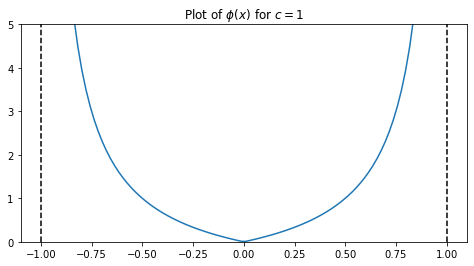

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def phi(u, c):
    return np.abs(u) / (c - np.abs(u))


c = 1
epsilon = 1e-8
x = np.linspace(-c + epsilon, c - epsilon, 100)
y = phi(x, c)

plt.figure(figsize=(8, 4))
plt.ylim(0, 5)
plt.title("Plot of $\phi(x)$ for $c=1$")
plt.axvline(-c, c="k", ls="--")
plt.axvline(c, c="k", ls="--")
plt.plot(x, y);

## Exercise 2
<div class="alert alert-info">
Exercise
    
We want to estimate the covariance matrix $\Sigma\in S_{++}^n$ of a multivariate normal distribution with mean $\mu\in \mathbb R^n$ from data. Given data $\mathbf x=(x_1,\dots,x_N)\in \mathbb R^{n\times N}$, this means we want to maximize the likelihood of $\mathbf x$ as a function of $\Sigma$. That is, we want to solve the following maximization problem:
    
$$
\begin{array}{l l}
    \text{maximize} & \prod_{i=1}^N (2\pi)^{-n/2}(\det \Sigma)^{-1/2} \exp \left( -\frac12 (x_i-\mu)^\top \Sigma^{-1} (x_i-\mu)\right)\\
    \text{subject to} & \Sigma\succ 0
\end{array}
$$

</div>

### Exercise 2a)
<div class="alert alert-info">
Exercise

Show that the problem above is equivalent to 
$$
\begin{array}{l l}
\text{minimize} & -\frac{N}{2} \log\det \Sigma^{-1} +\frac12 \langle A,\,\Sigma^{-1}\rangle \\
\text{subject to} & \Sigma\succ 0
\end{array}
$$

Where $A\in\mathbb S^n$ is a symmetric matrix. Recall that we proved in week 4 that $-\log\det$ is a convex function, so this is a convex problem in the variable $\Sigma^{-1}$.
</div>

### Exercise 2b)
<div class="alert alert-info">
Exercise

Recall from exercise 4 of week 4 that for $X\succeq 0$ and $Y$ symmetric, we have
$$
    \log \det (X+tY) = \log\det(X) + \log\det(I+tX^{-1/2}YX^{-1/2}).
$$
    
Using the Taylor series of $\log(1+x)$ and the fact that $\det(I+tA) = 1+\operatorname{tr} (tA) + o(t^2)$, show that the directional derivative of $\log \det$ satisfies
$$
  \left.\frac{\mathrm d}{\mathrm dt}\right|_{t=0}\log \det (X+tY) = \operatorname{tr}(X^{-1}Y)
$$

    
</div>

### Exercise 2c)
<div class="alert alert-info">
Exercise

Show that $(X+tY)^{-1} = X^{-1}(I+tYX^{-1})^{-1}$. Then use the power series $(1-x)^{-1} = \sum_{n=0}^\infty x^n$ to show that
$$
\left.\frac{\mathrm d}{\mathrm dt}\right|_{t=0}\operatorname{tr} (A(X+tY)^{-1}) = -\operatorname{tr}(X^{-1}AX^{-1}Y).
$$
    

</div>


### Exercise 2d)
<div class="alert alert-info">
Exercise

Assume $A\succ0$. Solve the minimization problem
$$
\begin{array}{l l}
\text{minimize} & \frac{N}{2} \log\det \Sigma +\frac12 \langle A,\,\Sigma^{-1}\rangle \\
\text{subject to} & \Sigma\succ 0
\end{array}
$$
    
First solve the unconstrained problem by computing the directional derivatives and setting them to zero. Show that the resulting solution $\Sigma^*$ satisfies $\Sigma^*\succ 0$.
    
</div>


### Exercise 2e)
<div class="alert alert-info">
Exercise

Assume $A\succ 0$. Write down the Lagrangian of 
$$
\begin{array}{l l}
\text{minimize} & \frac{N}{2} \log\det \Sigma +\frac12 \langle A,\,\Sigma^{-1}\rangle \\
\text{subject to} & \Sigma\succ 0
\end{array}
$$
    
Show that the critical points of the Lagrangian can be obtained by solving a quadratic matrix equation:
$$
X^2+aX+Y = 0
$$
    
Hint: $\Sigma$ is a critical point of $L(\Sigma,\Lambda)$ if
$$
\left.\frac{\mathrm d}{\mathrm dt}\right|_{t=0} L(\Sigma+tY,\Lambda) = 0,\qquad \forall Y\in\mathbb S^n
$$
    
This gives a matrix equation for the minimum. You can transform it to the required form by multiplying on the left and on the right by the symmetric square root of $A$, that is, $A^{\frac12}$.

</div>


### Exercise 2f)
<div class="alert alert-info">
Exercise

Let $X,Y$ be symmetric matrices, and consider the matrix equation $X^2+aX+Y$.

Like in the proof of the quadratic formula, we can complete the square. Find coefficients $\alpha,\beta\in\mathbb R$ such that
$$
(X+\alpha I)^2 = \beta I - Y 
$$
    
Find the condition on $Y$ such that the quadratic matrix equation has a solution and give a formula for the solution.
    
</div>


## Exercise 3
<div class="alert alert-info">
Exercise

Consider the following convex problem  
$$
\begin{array}{ll}
\text{Minimize} & e^{-x}\\
\text{Subject to} & x^2 / y \leq 0
\end{array}
$$

We consider this problem on the half-space domain $\mathcal D = \{ (x,y)\in \mathbb R^2\mid y>0\}$. 
    
</div>


### Exercise 3a)
<div class="alert alert-info">
Exercise

Find the feasible set and find the optimal value for the problem above.
    
</div>


### Exercise 3b)
<div class="alert alert-info">
Exercise

Show that the problem does not satisfy the (weak) Slater condition.
    
</div>


### Exercise 3c)
<div class="alert alert-info">
Exercise

Show that the optimal value of the dual of the problem is $0$. 
    
</div>


## Exercise 4

### Exercise 4a)
<div class="alert alert-info">
Exercise

Let $A\in \mathbb R^{n\times m}$, $x\in\mathbb R^n$, $b\in\mathbb R^m$. Find the dual of the following problem
$$
\begin{array}{ll}
\text{minimize} & \frac12 \|x\|^2\\
\text{subject to} & Ax=b
\end{array}
$$
    
</div>


### Exercise 4b)
<div class="alert alert-info">
Exercise

The problem of a) is equivalent to
$$
\begin{array}{ll}
\text{minimize} & \|x\|\\
\text{subject to} & Ax=b
\end{array}
$$
    
Find the dual of this problem. 

Hint: first try to minimize the Lagrangian for a fixed value of $\|x\|$. Use this to write the dual function as an infimum over a scalar parameter $t\geq 0$.
    
</div>